**Malleability task: data preparation and experiments**

In [1]:
%matplotlib inline
import json
import pickle
import string
import re
import nltk
import pprint
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pp = pprint.PrettyPrinter(width=100)

import warnings
warnings.filterwarnings('ignore')

In [2]:
subs = pickle.load(open('/home/username/workspace/data/output/_jobs/pairs_winargs_malleability.pickle','rb'))
len(subs)

16150

In [8]:
delta = list(filter(lambda x: x['delta'], subs))
len(delta)

4133

In [9]:
subs_authors = set(map(lambda x: x['author'], subs))
len(subs_authors)

11806

In [10]:
len(subs_authors.intersection(liwc_authors))

4641

In [2]:
liwc_posts_merged = pickle.load(open('/home/username/workspace/data/output/_jobs/liwc_posts_merged.pickle','rb'))

In [3]:
print(liwc_posts_merged[0])

('nonfish', '&gt;&gt;Someone\'s belief in God can conform to all available science.\n\n&gt;No, it cannot. The belief system revolves around faith, which means believing something without evidence.\n\nA Clarification: I read the first statement as saying "a belief in God does not inherently contradict science." I read the second statement as a direct contradiction to this point. If I misunderstood, I apologize for the ensuing rant.\n\nHere\'s the definition of science, pulled straight from google:\n\n&gt;the intellectual and practical activity encompassing the systematic study of the structure and behavior of the physical and natural world through observation and experiment.\n\nBy this definition, science is concerned only with what is observable. Science is a way of knowing the observable world. Science is concerned with what is testable. \n\nNow anything that can be observed, or any hypothesis yielding testable hypotheses, is subject to science. If hypotheses yield predictions that ar

In [161]:
len(liwc_posts_merged)

9709

In [4]:
!ls -la /home/username/workspace/data/output/_jobs/features/

total 8742764
drwxrwxr-x 3 username username       4096 May  7  2019 .
drwxrwxr-x 5 username username       4096 May  7 12:10 ..
-rw-rw-r-- 1 username username 2062693859 Mar 20  2019 author_category_entity_vec.pickle
-rw-rw-r-- 1 username username  417938349 Mar 13  2019 author_category_subreddit_vec.pickle
-rw-rw-r-- 1 username username   29635370 Mar 13  2019 author_category_vec.pickle
-rw-rw-r-- 1 username username    1412817 Apr 12  2019 author_entity_pca5.pickle
-rw-rw-r-- 1 username username 1266519221 Mar 13  2019 author_entity_vec.pickle
-rw-rw-r-- 1 username username     429470 May  7  2019 author_history_words_dict.pickle
-rw-rw-r-- 1 username username   61066496 Apr  2  2019 author_liwc_dict.pickle
-rw-rw-r-- 1 username username   18769132 Apr  7  2019 author_liwc_vec.pickle
-rw-rw-r-- 1 username username   75388243 Mar 28  2019 author_sentity_category_pca.pickle
-rw-rw-r-- 1 username username  691176561 Mar 27  2019 author_sentity_category_vec.pickle
-rw-rw-r-- 1 username 

In [7]:
# author_subreddit_vec = pickle.load(open('/home/username/workspace/data/output/_jobs/features/author_subreddit_vec.pickle','rb'))
# len(author_subreddit_vec)
# author_category_vec = pickle.load(open('/home/username/workspace/data/output/_jobs/features/author_category_vec.pickle','rb'))
# len(author_category_vec)
author_sentity_category_vec = pickle.load(open('/home/username/workspace/data/output/_jobs/features/author_sentity_category_vec.pickle','rb'))
len(author_sentity_category_vec)


12287

In [8]:
author_category_vec['huadpe']

{'lntfidf': <1x158 sparse matrix of type '<class 'numpy.float64'>'
 	with 27 stored elements in Compressed Sparse Row format>,
 'raw': <1x158 sparse matrix of type '<class 'numpy.float64'>'
 	with 27 stored elements in Compressed Sparse Row format>,
 'rawnorm': <1x158 sparse matrix of type '<class 'numpy.float64'>'
 	with 27 stored elements in Compressed Sparse Row format>,
 'tfidf': <1x158 sparse matrix of type '<class 'numpy.float64'>'
 	with 27 stored elements in Compressed Sparse Row format>}

In [2]:
author_liwc_dict = pickle.load(open('/home/username/workspace/data/output/_jobs/features/author_liwc_dict.pickle','rb'))
len(author_liwc_dict)

9705

In [3]:
author_liwc_dict['huadpe']

{'_links': {},
 'author': 'huadpe',
 'communication_recommendation': "Get to the point quickly and don't waste their time. Try to avoid telling them what to do. Don't take offense if they seem a little uninterested.",
 'content_date': '2019-04-01T03:03:03.842097+00:00',
 'content_source': 4,
 'content_tags': [],
 'emotional_analysis': {'emotional_tone': {'rating': 'Neutral',
   'score': 46.7596},
  'facets': {'anger': 31.249999121250045,
   'fear': 11.93181769523763,
   'sad': 18.749999600568206}},
 'language': 'english',
 'liwc_scores': {'analytic': 86.6232,
  'authentic': 13.799979,
  'categories': {'AllPunc': 0.37082148,
   'Apostro': 0.012802276,
   'Colon': 0.0035561877,
   'Comma': 0.043296587,
   'Dash': 0.012624467,
   'Exclam': 0.005512091,
   'OtherP': 0.1816323,
   'Parenth': 0.028716216,
   'Period': 0.07139047,
   'QMark': 0.0045341393,
   'Quote': 0.0024004267,
   'SemiC': 0.00435633,
   'achieve': 0.009601707,
   'adj': 0.04569701,
   'adverb': 0.031827882,
   'affect': 

In [123]:
author_liwc_dict['huadpe']['receptiviti_scores'].keys()

dict_keys(['raw_scores', 'percentiles', 'warnings'])

In [3]:
author_liwc_vec = pickle.load(open('/home/username/workspace/data/output/_jobs/features/author_liwc_vec.pickle', 'rb'))
len(author_liwc_vec)

9705

In [6]:
liwc_authors = set(author_liwc_dict.keys())

In [ ]:
author_liwc_vec['huadpe']

In [7]:
subs_liwc = list(filter(lambda x: x['author'] in liwc_authors, subs))
len(subs_liwc)

8121

In [14]:
subs_liwc[0].keys()

dict_keys(['num_comments', 'comments', 'saved', 'created_utc', 'subtrees', 'subreddit_id', 'created', 'quarantine', 'hide_score', 'downs', 'from', 'retrieved_on', 'ups', 'distinguished', 'id', 'archived', 'name', 'urls', 'from_id', 'title', 'domain', 'media_embed', 'url', 'author_flair_css_class', 'permalink', 'secure_media_embed', 'edited', 'thumbnail', 'secure_media', 'gilded', 'is_self', 'link_flair_text', 'delta', 'author', 'media', 'over_18', 'stickied', 'link_flair_css_class', 'score', 'selftext', 'from_kind', 'author_flair_text', 'subreddit'])

In [8]:
subs_liwc_delta = list(filter(lambda x: x['delta'], subs_liwc))
len(subs_liwc_delta)

3186

In [9]:
subs_liwc_authors = set(map(lambda x: x['author'], subs_liwc))
len(subs_liwc_authors)

4641

In [77]:
list(map(lambda x: x['deltas_total'], subs_liwc))[:25]

[0, 0, 0, 4, 0, 4, 0, 0, 4, 2, 1, 1, 1, 1, 1, 0, 2, 0, 2, 1, 1, 3, 2, 2, 3]

In [ ]:
subssubtrees

In [72]:
any([s['deltas_total'] for s in subs_liwc])

True

In [71]:
def get_deltas_num(tree):
    total = 0
    for c in tree['comments']:
        if c['delta']:
            total += 1
    return total
        
# subs_liwc2 = sum([get_deltas_num(x) for x in subs_liwc['subtrees']])
for s in subs_liwc:
    total = 0
    for subtree in s['subtrees']:
        subtree_deltas = get_deltas_num(subtree)
        total += subtree_deltas
    s['deltas_total'] = total
subs_liwc[0].keys()

dict_keys(['comments', 'selftext', 'subtrees', 'subreddit_id', 'id', 'created_utc', 'downs', 'media', 'retrieved_on', 'distinguished', 'name', 'domain', 'media_embed', 'secure_media_embed', 'edited', 'title', 'secure_media', 'hide_score', 'archived', 'link_flair_css_class', 'stickied', 'over_18', 'subreddit', 'num_comments', 'url', 'deltas_total', 'quarantine', 'author', 'gilded', 'author_flair_css_class', 'saved', 'created', 'thumbnail', 'urls', 'from_id', 'from', 'ups', 'permalink', 'from_kind', 'link_flair_text', 'author_flair_text', 'delta', 'score', 'is_self'])

In [ ]:
# def top_level(sub):
#     top_coms = sub['comments']

#     delta_submission = False
#     subtrees = []
#     for com in top_coms:
#         # if com['author'] == '[deleted]' or com['body'] in ['', '[removed]'] or com['author'] in set(botlist.value):
#         #     continue

#         root_author = com['author']
#         comments = []
#         delta_subtree = False
#         process_subtree(com, sub, op, root_author, comments)
#         ### TODO: cut all comments after delta
#         cut = []
#         for c in comments:
#             cut.append(c)
#             if c['delta']:
#                 delta_subtree = True
#                 delta_submission = True
#                 break
#         subtrees.append({'delta': delta_subtree, 'author': root_author, 'comments': cut})

#     sub['subtrees'] = subtrees

#     return sub


# def process_subtree(comment, sub, op, root_author, comments):
#     if comment['author'] == root_author:
#         delta = is_delta(comment, op)
#         c = {k:v for k,v in comment.items() if k not in ['children']}
#         c['delta'] = delta
#         comments.append(c)

#     for com in comment['children']:
#         process_subtree(com, sub, op, root_author, comments)

# def is_delta(com, op):
#     for c in com['children']:
#         # consider only deltas given by OP
#         if c['author'] == op:
#             for x in c['children']:
#                 if x['author'] == 'DeltaBot':
#                     return True
#     return False

# pairs = threads.map(lambda x: top_level(x, botlist)).filter(lambda x: x)


In [5]:
len(subs_liwc2)

NameError: name 'subs_liwc2' is not defined

In [4]:
deltas_total_df = pd.DataFrame(x, columns=['num'])
deltas_total_df.head()

NameError: name 'x' is not defined

In [79]:
x = list(map(lambda x: x['deltas_total'], subs_liwc))

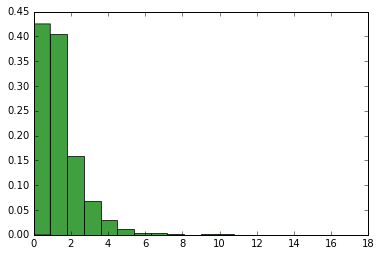

In [42]:
import matplotlib.pyplot as plt

# the histogram of the data
n, bins, patches = plt.hist(x, 20, normed=1, facecolor='g', alpha=0.75)
plt.show()

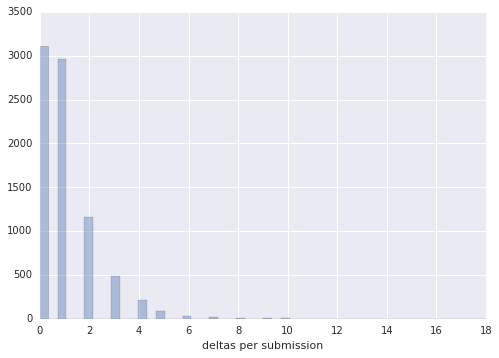

In [173]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

g = sns.distplot(x, kde=False)
g.set(xlabel='deltas per submission')
# g.set_yscale('log')

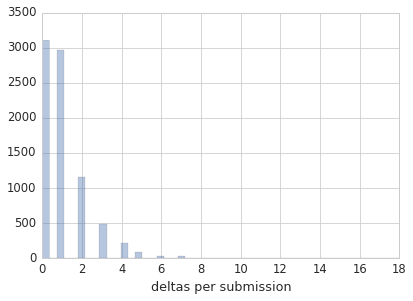

In [120]:
f, ax = plt.subplots()
sns.set(font_scale=1.45, style="whitegrid", context="paper")
sns.set_color_codes("pastel")

g = sns.distplot(x, kde=False)
g.set(xlabel='deltas per submission')

f.savefig('/home/username/workspace/figures/deltas_per_sub.pdf', bbox_inches="tight")

In [156]:
author_liwc_vec['huadpe']['raw_scores'].size

59

In [45]:
### add author liwc features

author_liwc_vec['huadpe']

{'bigfive': array([[18.48171463, 64.42365301, 21.45324664, 75.4370774 , 42.71890376]]),
 'liwc_scores': array([[3.7082148e-01, 1.2802276e-02, 3.5561877e-03, 4.3296587e-02,
         1.2624467e-02, 5.5120910e-03, 1.8163230e-01, 2.8716216e-02,
         7.1390470e-02, 4.5341393e-03, 2.4004267e-03, 4.3563300e-03,
         9.6017070e-03, 4.5697010e-02, 3.1827882e-02, 4.3118775e-02,
         2.3293030e-02, 4.8897583e-03, 1.8669986e-03, 6.9967990e-02,
         3.5561877e-04, 7.2279510e-02, 8.8904700e-03, 1.7780939e-03,
         1.7425320e-02, 1.0490754e-02, 1.0659673e-01, 2.5160028e-02,
         4.6941680e-02, 4.4452347e-04, 3.3605974e-02, 1.4847084e-02,
         8.7126600e-02, 8.0014224e-04, 4.1785208e-03, 8.8904690e-05,
         8.8904690e-05, 4.9786630e-03, 1.5647227e-02, 8.1169985e-02,
         2.6671408e-04, 4.3607754e-01, 4.7119490e-03, 4.0896160e-03,
         2.9338550e-03, 1.0224040e-02, 2.8805122e-02, 2.5782362e-03,
         2.3381935e-02, 9.8684210e-03, 4.9786627e-02, 1.1824325e-02,


In [16]:
for s in subs_liwc:
    a = s['author']
    s['bigfive'] = author_liwc_vec[a]['bigfive']
    s['liwc_scores'] = author_liwc_vec[a]['liwc_scores']
    s['percentiles'] = author_liwc_vec[a]['percentiles']
    s['raw_scores'] = author_liwc_vec[a]['raw_scores']
subs_liwc[0]

{'archived': False,
 'author': 'parissyndrome1988',
 'author_flair_css_class': None,
 'author_flair_text': None,
 'bigfive': array([[19.74287333, 20.60301721, 36.6289608 , 96.33941371, 66.10804477]]),
 'comments': [{'archived': False,
   'author': 'mc-lunar',
   'author_flair_css_class': None,
   'author_flair_text': None,
   'body': 'Hey i live in toronto... it\'s definitely not the best city in north america. I\'d give that to either SF (where I\'ve lived) or NY. \n\n i\'m gonna specifically address a couple of your points. \n\n&gt;The food is excellent\n\nIn general toronto has a lot of good food, as will any large city, but there are many notable exceptions that are surprising. Good indian food or chinese food you usually have to trek ~1 hr out to the suburbs to find. Good mexican food? GOOD LUCK.\n\n&gt;all the parks\n\nToronto technically has over 1500 parks and this is usually a "selling point" of toronto but the truth is that a huge majority of these are "Parkettes" where the c

In [10]:
### split pairs into training and heldout
from datetime import datetime
d = datetime.strptime('2017-04-01', "%Y-%m-%d").timestamp()
training_subs = list(filter(lambda x: int(x['created_utc']) < d, subs_liwc))
heldout_subs = list(filter(lambda x: int(x['created_utc']) >= d, subs_liwc))
print(len(training_subs), len(heldout_subs))

6791 1330


In [11]:
len(heldout_subs)

1330

In [12]:
heldout_subs_delta = list(filter(lambda x: x['delta'], heldout_subs))
len(heldout_subs_delta)

896

In [15]:
heldout_subs_nodelta = list(filter(lambda x: x['delta'] is False, heldout_subs))
len(heldout_subs_nodelta)

434

In [130]:
training_subs[0].keys()

dict_keys(['permalink', 'name', 'saved', 'stickied', 'from', 'title', 'comments', 'author_flair_text', 'gilded', 'num_comments', 'subreddit', 'created', 'media_embed', 'ups', 'retrieved_on', 'link_flair_text', 'distinguished', 'domain', 'thumbnail', 'quarantine', 'created_utc', 'urls', 'liwc_scores', 'from_kind', 'downs', 'is_self', 'subtrees', 'archived', 'author_flair_css_class', 'over_18', 'bigfive', 'link_flair_css_class', 'media', 'delta', 'percentiles', 'selftext', 'url', 'raw_scores', 'score', 'id', 'from_id', 'secure_media', 'hide_score', 'subreddit_id', 'secure_media_embed', 'edited', 'author'])

In [134]:
def remove_footer(x):
    text = x['selftext']
    if "_____" in text and "Hello, users of CMV!" in text and not text.startswith("_____"):
        text = text.split("_____")[0]
    if "This is a footnote from the CMV moderators." in s['selftext']:
        text = text.split("This is a footnote from the CMV moderators.")[0]    
    return {'text': re.sub(r"http\S+", "", text), 'delta': x['delta']}

In [135]:
training_corpus = [remove_footer(s) for s in training_subs]
heldout_corpus = [remove_footer(s) for s in heldout_subs]

In [136]:
full_train_df = pd.DataFrame(training_corpus)
full_test_df = pd.DataFrame(heldout_corpus)

In [178]:
full_train_df.head(3)

,delta,text
0,False,I visited Toronto in 2012 and was extremely im...
1,False,This year I was enrolled in three AP courses: ...
2,False,Myself included.... I've made my life sooooo m...


In [138]:
from sklearn.base import TransformerMixin

class DenseTransformer(TransformerMixin):

    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None, **fit_params):
        return X.todense()

/home/username/.local/lib/python3.4/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/username/.local/lib/python3.4/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/username/.local/lib/python3.4/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


np.mean:  0.5022556390977444
Accuracy: 50.23%

F1 Score: 56.79

COnfusion Matrix:
 [[233 201]
 [461 435]]

               precision    recall  f1-score   support

       False       0.34      0.54      0.41       434
        True       0.68      0.49      0.57       896

   micro avg       0.50      0.50      0.50      1330
   macro avg       0.51      0.51      0.49      1330
weighted avg       0.57      0.50      0.52      1330



/home/username/.local/lib/python3.4/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


precision, recall: 0.5098485672339732 0.511178715437788


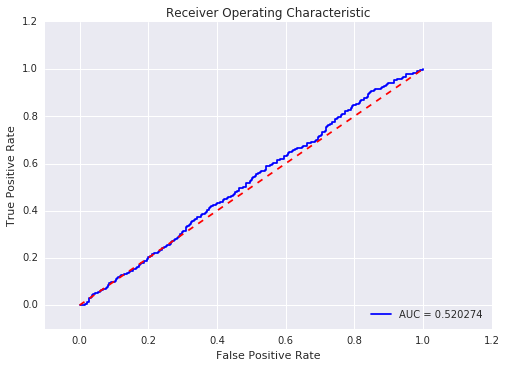

In [211]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn import preprocessing

task2_pipeline = Pipeline([
    ('cv', CountVectorizer(min_df=5)),
    ('to_dense', DenseTransformer()),
    ('transformer', preprocessing.StandardScaler()),
    ('logreg', LogisticRegression(penalty='l1'))
])

task2_pipeline.fit(full_train_df['text'], full_train_df['delta'])
predicted = task2_pipeline.predict(full_test_df['text'])
print('np.mean: ', np.mean(predicted == full_test_df['delta'])  )

metrics.confusion_matrix(full_test_df['delta'], predicted)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
y_test, y_pred = full_test_df['delta'], predicted
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, y_pred) * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n",classification_report(y_test, y_pred))

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred_proba = task2_pipeline.predict_proba(full_test_df['text'])[::,1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(full_test_df['delta'], y_pred_proba)
roc_auc = auc(false_positive_rate, true_positive_rate)

from sklearn.metrics import roc_curve, auc, precision_recall_fscore_support
precision, recall, _, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
print('precision, recall:', precision, recall)


plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.6f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [88]:
def add_prefix(d, prefix, top_cats=None):
    newd = {}
    for k,v in d.items():
        if top_cats is not None:
            if k in top_cats:
                newd[prefix+'_'+k] = v
        else:
            newd[prefix+'_'+k] = v
    return newd

from collections import defaultdict
def prepare_dict(x):
    _dict = defaultdict(dict)
    
#     ### traits_features
    _dict['bigfive'].update(dict( [(str(k),v) for k,v in enumerate(x['bigfive'].tolist()[0])] ))
    _dict['percentiles'].update(dict( [(k,v) for k,v in enumerate(x['percentiles'].tolist()[0])] ))
    _dict['raw'].update(dict( [(str(k),v) for k,v in enumerate(x['raw_scores'].tolist()[0])] ))
    _dict['liwc'].update(dict( [(str(k),v) for k,v in enumerate(x['raw_scores'].tolist()[0])] ))

    _dict['delta'] = x['delta']
#     _dict['deltas_total'] = x['deltas_total']
    return dict(_dict)

full_data = list(map(lambda x: prepare_dict(x), subs_liwc))
# training_data = list(map(lambda x: prepare_dict(x), subs_liwc))
# training_data = list(map(lambda x: prepare_dict(x), training_subs))
# heldout_data = list(map(lambda x: prepare_dict(x), heldout_subs))
# first = training_data[0]
# first
full_data[0]

{'bigfive': {'0': 19.742873334602926,
  '1': 20.603017207018492,
  '2': 36.62896079699558,
  '3': 96.33941370827178,
  '4': 66.10804477093102},
 'delta': False,
 'liwc': {'0': -3.750920982615968,
  '1': -5.586767555265811,
  '10': 3.4336583720069216,
  '11': -0.1040641650306875,
  '12': 2.165057028953923,
  '13': -0.35102487014680256,
  '14': 0.763395939268787,
  '15': 3.959482654478401,
  '16': 0.5440336070093673,
  '17': -3.8826161608887286,
  '18': 0.9097936621128756,
  '19': -2.281065943259378,
  '2': 1.6043461047476648,
  '20': 0.732752738488709,
  '21': 0.39182758086987984,
  '22': 2.305322937599041,
  '23': 0.17664377,
  '24': 0.17664377,
  '25': 0.9926043256542426,
  '26': -3.4069562538519875,
  '27': -2.0013740186063673,
  '28': 1.2916833748779648,
  '29': 0.7163886,
  '3': 9.206865268189922,
  '30': -1.0115411174932132,
  '31': -0.895619718046887,
  '32': 2.063695885303743,
  '33': -4.470317972197037,
  '34': 1.807232443706606,
  '35': 10.126415881900316,
  '36': 0.7262022,
 

In [89]:
full_df = pd.io.json.json_normalize(full_data, sep='_')

KeyError: '0'

In [19]:
full_df.head(5)

,bigfive_0,bigfive_1,bigfive_2,bigfive_3,bigfive_4,delta,liwc_0,liwc_1,liwc_10,liwc_11,...,raw_53,raw_54,raw_55,raw_56,raw_57,raw_58,raw_6,raw_7,raw_8,raw_9
0,19.742873,20.603017,36.628961,96.339414,66.108045,False,-3.750921,-5.586768,3.433658,-0.104064,...,10.734267,-0.327891,-0.290549,11.555407,2.001963,-7.627171,3.206405,4.030115,4.183549,0.314033
1,35.431838,41.193314,38.395581,95.076444,55.878445,False,-2.253538,-7.973544,5.064616,-0.596960,...,8.134317,-1.652893,-1.389825,10.473365,2.500000,-5.425022,5.406838,3.458699,1.560017,0.823244
2,38.189993,25.238375,28.037059,99.000000,83.606961,False,-3.998004,-8.691633,6.535679,-0.803617,...,12.282943,-2.658470,0.242464,13.510494,2.073891,-8.480572,4.772022,5.288079,2.627258,0.233484
3,5.475069,97.558498,23.616657,57.359914,16.258598,True,-3.207101,-2.611083,6.029721,-0.717067,...,7.980241,0.747332,-0.896811,9.460710,2.500000,-0.744703,2.038156,1.871627,4.029302,0.101338
4,27.601246,65.896501,50.489671,81.744012,59.074196,False,-1.348760,-5.828427,3.985495,-0.014548,...,7.993133,-0.462826,-0.603549,8.775061,2.500000,-5.746481,2.945524,3.576076,2.364748,0.582544


In [219]:
training_df = pd.io.json.json_normalize(training_data, sep='_')
heldout_df = pd.io.json.json_normalize(heldout_data, sep='_')
print(len(training_df.columns))
training_df.head(5)

183


,bigfive_0,bigfive_1,bigfive_2,bigfive_3,bigfive_4,delta,liwc_0,liwc_1,liwc_10,liwc_11,...,raw_53,raw_54,raw_55,raw_56,raw_57,raw_58,raw_6,raw_7,raw_8,raw_9
0,19.742873,20.603017,36.628961,96.339414,66.108045,False,-3.750921,-5.586768,3.433658,-0.104064,...,10.734267,-0.327891,-0.290549,11.555407,2.001963,-7.627171,3.206405,4.030115,4.183549,0.314033
1,35.431838,41.193314,38.395581,95.076444,55.878445,False,-2.253538,-7.973544,5.064616,-0.596960,...,8.134317,-1.652893,-1.389825,10.473365,2.500000,-5.425022,5.406838,3.458699,1.560017,0.823244
2,38.189993,25.238375,28.037059,99.000000,83.606961,False,-3.998004,-8.691633,6.535679,-0.803617,...,12.282943,-2.658470,0.242464,13.510494,2.073891,-8.480572,4.772022,5.288079,2.627258,0.233484
3,5.475069,97.558498,23.616657,57.359914,16.258598,True,-3.207101,-2.611083,6.029721,-0.717067,...,7.980241,0.747332,-0.896811,9.460710,2.500000,-0.744703,2.038156,1.871627,4.029302,0.101338
4,27.601246,65.896501,50.489671,81.744012,59.074196,False,-1.348760,-5.828427,3.985495,-0.014548,...,7.993133,-0.462826,-0.603549,8.775061,2.500000,-5.746481,2.945524,3.576076,2.364748,0.582544


In [113]:
df = training_df.drop(['delta'], axis=1)
df_norm = (df - df.mean()) / (df.max() - df.min())
df_norm = df_norm.fillna(0.0)

X = df_norm
y = training_df['delta']
print(X.shape)
X.head(5)

(8121, 182)


,bigfive_0,bigfive_1,bigfive_2,bigfive_3,bigfive_4,liwc_0,liwc_1,liwc_10,liwc_11,liwc_12,...,raw_53,raw_54,raw_55,raw_56,raw_57,raw_58,raw_6,raw_7,raw_8,raw_9
0,-0.175509,-0.271599,-0.047269,0.117928,0.061236,-0.128308,-0.023257,-0.146950,-0.008938,0.176014,...,0.111416,0.089343,-0.027628,0.070924,-0.065612,-0.148377,-0.101146,-0.012084,0.332023,-0.007419
1,0.001249,-0.058611,-0.027128,0.100195,-0.049975,0.073065,-0.175349,0.049166,-0.087559,0.020799,...,-0.085898,-0.120904,-0.194829,-0.011180,0.148667,0.040086,0.102258,-0.112709,-0.216035,0.196266
2,0.032323,-0.223650,-0.145225,0.155286,0.251475,-0.161537,-0.221108,0.226055,-0.120522,0.135855,...,0.228948,-0.280465,0.053443,0.219273,-0.034665,-0.221412,0.043577,0.209441,0.006912,-0.039638
3,-0.336255,0.524434,-0.195622,-0.429395,-0.480700,-0.055173,0.166362,0.165216,-0.106717,-0.144348,...,-0.097591,0.259955,-0.119841,-0.088018,0.148667,0.440632,-0.209136,-0.392189,0.299801,-0.092497
4,-0.086973,0.196920,0.110756,-0.087010,-0.015232,0.194743,-0.038656,-0.080594,0.005341,-0.124189,...,-0.096613,0.067932,-0.075236,-0.140044,0.148667,0.012575,-0.125261,-0.092039,-0.047926,0.099986


In [220]:
data=training_df
print(data.shape)
print(len(data[data['delta']==0]))
print(len(data[data['delta']==1]))

print("percentage of neg", ((len(data[data['delta']==0]))/((len(data[data['delta']==0]))+(len(data[data['delta']==1]))))*100)
print("percentage of pos", (len(data[data['delta']==1]))/((len(data[data['delta']==0]))+(len(data[data['delta']==1])))*100)

(6791, 183)
4501
2290
percentage of neg 66.27889854218819
percentage of pos 33.721101457811805


In [69]:
training_df.groupby(training_df.delta).mean().transpose()

delta,False,True
bigfive_0,33.508683,36.444605
bigfive_1,47.704899,46.335337
bigfive_2,41.554983,40.291505
bigfive_3,89.428997,87.018051
bigfive_4,60.522562,60.446019
liwc_0,-2.800448,-2.794603
liwc_1,-4.875584,-5.436447
liwc_10,4.676427,4.642913
liwc_11,-0.126879,0.000855
liwc_12,0.535255,0.655402


In [ ]:
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

In [180]:
X_train.head(5)

,bigfive_0,bigfive_1,bigfive_2,bigfive_3,bigfive_4,liwc_0,liwc_1,liwc_10,liwc_11,liwc_12,...,raw_53,raw_54,raw_55,raw_56,raw_57,raw_58,raw_6,raw_7,raw_8,raw_9
0,19.742873,20.603017,36.628961,96.339414,66.108045,-3.750921,-5.586768,3.433658,-0.104064,2.165057,...,10.734267,-0.327891,-0.290549,11.555407,2.001963,-7.627171,3.206405,4.030115,4.183549,0.314033
1,35.431838,41.193314,38.395581,95.076444,55.878445,-2.253538,-7.973544,5.064616,-0.596960,0.793242,...,8.134317,-1.652893,-1.389825,10.473365,2.500000,-5.425022,5.406838,3.458699,1.560017,0.823244
2,38.189993,25.238375,28.037059,99.000000,83.606961,-3.998004,-8.691633,6.535679,-0.803617,1.810122,...,12.282943,-2.658470,0.242464,13.510494,2.073891,-8.480572,4.772022,5.288079,2.627258,0.233484
3,5.475069,97.558498,23.616657,57.359914,16.258598,-3.207101,-2.611083,6.029721,-0.717067,-0.666348,...,7.980241,0.747332,-0.896811,9.460710,2.500000,-0.744703,2.038156,1.871627,4.029302,0.101338
4,27.601246,65.896501,50.489671,81.744012,59.074196,-1.348760,-5.828427,3.985495,-0.014548,-0.488178,...,7.993133,-0.462826,-0.603549,8.775061,2.500000,-5.746481,2.945524,3.576076,2.364748,0.582544


In [228]:
training_df.shape

(6791, 183)

In [229]:
combined_df = pd.concat([training_df, heldout_df]) 

In [230]:
combined_df.shape

(8121, 183)

(6090, 182)
(2031, 182)
Accuracy: 62.19%

F1 Score: 35.03

COnfusion Matrix:
 [[1056  203]
 [ 565  207]]

               precision    recall  f1-score   support

       False       0.65      0.84      0.73      1259
        True       0.50      0.27      0.35       772

   micro avg       0.62      0.62      0.62      2031
   macro avg       0.58      0.55      0.54      2031
weighted avg       0.60      0.62      0.59      2031

precision, recall: 0.578163885587036 0.5534478181960352


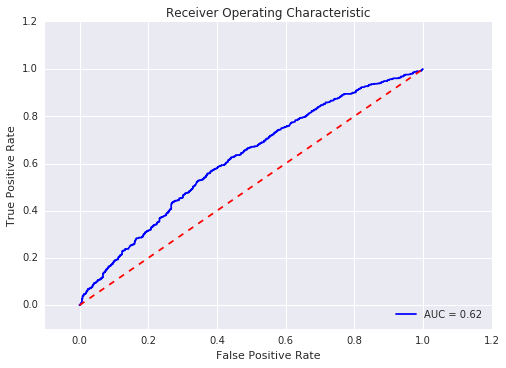

In [231]:
# X_train = training_df.drop(['delta'], axis=1)
# y_train = training_df['delta']

# X_test = heldout_df.drop(['delta'], axis=1)
# y_test = heldout_df['delta']


X=combined_df.drop(['delta'], axis=1)
y=combined_df['delta']
X_train, X_test, y_train, y_test = train_test_split(X, y)

print(X_train.shape)
print(X_test.shape)

clf = Pipeline([
#     ('transformer', Normalizer()),
#     ('scaler', preprocessing.StandardScaler()),
    ('logreg', LogisticRegression(penalty='l2'))
])
# clf = LogisticRegression(penalty='l1') #class_weight='balanced' class_weight={0:, 1:}
clf.fit(X_train, y_train)
# l1 - 67.06% 0.72
# l2 - 68.78% 0.72

# from sklearn.ensemble import RandomForestClassifier
# clf=RandomForestClassifier(**rf_random.best_params_)#, class_weight='balanced' criterion='gini'
# clf.fit(X_train,y_train)
# 67.95% 0.72

# from sklearn import svm
# clf = svm.SVC(probability=True)
# clf.fit(X_train.values.reshape(X_train.shape[0],X_train.shape[1]), y_train.values)
# 66.96% 0.61

y_pred=clf.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, y_pred) * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n",classification_report(y_test, y_pred))

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred_proba = clf.predict_proba(X_test)[::,1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(false_positive_rate, true_positive_rate)

from sklearn.metrics import roc_curve, auc, precision_recall_fscore_support
precision, recall, _, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
print('precision, recall:', precision, recall)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
full_train_df = pd.DataFrame(training_corpus)
full_test_df = pd.DataFrame(heldout_corpus)

In [208]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import make_pipeline

def select_text_data(X):
    return X['text']

def select_remaining_data(X):
    return X.drop('text', axis=1)

text_pipeline = Pipeline([
    ('column_selection', FunctionTransformer(select_text_data, validate=False)),
    ('cv', CountVectorizer(min_df=5)),
#     ('to_dense', DenseTransformer()),
#     ('transformer', preprocessing.StandardScaler()),
#     ('logreg', LogisticRegression(penalty='l2'))
])
other_pipeline = Pipeline([
    ('column_selection', FunctionTransformer(select_remaining_data, validate=False)),
    ('scaler', preprocessing.StandardScaler()),
])


final_pipeline = Pipeline([(
    'feature-union', FeatureUnion([
        ('text-features', text_pipeline), 
        ('other-features', other_pipeline)
        ])
    ),
    ('logreg', LogisticRegression(penalty='l2'))
    ])


In [ ]:
X_train['text'].isnull().values.any()

In [204]:
print(X_train.shape)
print(full_train_df.shape)

(6791, 182)
(6791, 2)


In [232]:
full_text_df = pd.concat([full_train_df, full_test_df]) 

Accuracy: 59.13%

F1 Score: 49.20

COnfusion Matrix:
 [[799 415]
 [415 402]]

               precision    recall  f1-score   support

       False       0.66      0.66      0.66      1214
        True       0.49      0.49      0.49       817

   micro avg       0.59      0.59      0.59      2031
   macro avg       0.58      0.58      0.58      2031
weighted avg       0.59      0.59      0.59      2031

precision, recall: 0.5750994618072709 0.5750994618072709


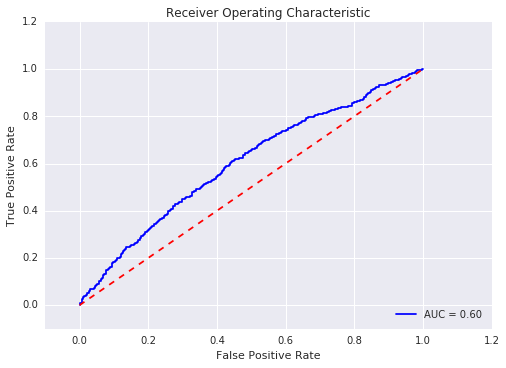

In [234]:
# X_train = training_df.drop(['delta'], axis=1)
# X_train['text'] = full_train_df['text']
# y_train = training_df['delta']

# X_test = heldout_df.drop(['delta'], axis=1)
# X_test['text'] = full_test_df['text']
# y_test = heldout_df['delta']
_df = combined_df
_df['text'] = full_text_df['text']
X=_df.drop(['delta'], axis=1)
y=_df['delta']
X_train, X_test, y_train, y_test = train_test_split(X, y)

final_pipeline.fit(X_train, y_train)
y_pred=final_pipeline.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, y_pred) * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n",classification_report(y_test, y_pred))

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred_proba = final_pipeline.predict_proba(X_test)[::,1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(false_positive_rate, true_positive_rate)

from sklearn.metrics import roc_curve, auc, precision_recall_fscore_support
precision, recall, _, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
print('precision, recall:', precision, recall)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [72]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pp.pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [73]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed: 15.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 34.3min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_leaf': [1, 2, 4], 'max_features': ['auto', 'sqrt'], 'min_samples_split': [2, 5, 10], 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [74]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 1000}

In [255]:
plot_df = pd.concat([training_df, heldout_df]) 

In [23]:
labels = ['agreeableness',
    'conscientiousness',
    'extraversion',
    'neuroticism',
    'openness']

In [25]:
labels_p = ['active',
 'adjustment',
 'adventurous',
 'aggressive',
 'agreeableness',
 'ambitious',
 'anxious',
 'artistic',
 'assertive',
 'body_focus',
 'cautious',
 'cheerful',
 'cold',
 'conscientiousness',
 'cooperative',
 'depression',
 'disciplined',
 'dutiful',
 'emotionally_aware',
 'empathetic',
 'energetic',
 'extraversion',
 'family_oriented',
 'food_focus',
 'friend_focus',
 'friendly',
 'generous',
 'genuine',
 'happiness',
 'health_oriented',
 'humble',
 'imaginative',
 'impulsive',
 'independent',
 'insecure',
 'intellectual',
 'leisure_oriented',
 'liberal',
 'melancholy',
 'money_oriented',
 'netspeak_focus',
 'neuroticism',
 'openness',
 'organized',
 'persuasive',
 'power_driven',
 'religion_oriented',
 'reward_bias',
 'self_assured',
 'self_conscious',
 'sexual_focus',
 'sociable',
 'social_skills',
 'stressed',
 'thinking_style',
 'trusting',
 'type_a',
 'work_oriented',
 'workhorse']

In [147]:
list(full_df.columns)

['bigfive_0',
 'bigfive_1',
 'bigfive_2',
 'bigfive_3',
 'bigfive_4',
 'delta',
 'liwc_0',
 'liwc_1',
 'liwc_10',
 'liwc_11',
 'liwc_12',
 'liwc_13',
 'liwc_14',
 'liwc_15',
 'liwc_16',
 'liwc_17',
 'liwc_18',
 'liwc_19',
 'liwc_2',
 'liwc_20',
 'liwc_21',
 'liwc_22',
 'liwc_23',
 'liwc_24',
 'liwc_25',
 'liwc_26',
 'liwc_27',
 'liwc_28',
 'liwc_29',
 'liwc_3',
 'liwc_30',
 'liwc_31',
 'liwc_32',
 'liwc_33',
 'liwc_34',
 'liwc_35',
 'liwc_36',
 'liwc_37',
 'liwc_38',
 'liwc_39',
 'liwc_4',
 'liwc_40',
 'liwc_41',
 'liwc_42',
 'liwc_43',
 'liwc_44',
 'liwc_45',
 'liwc_46',
 'liwc_47',
 'liwc_48',
 'liwc_49',
 'liwc_5',
 'liwc_50',
 'liwc_51',
 'liwc_52',
 'liwc_53',
 'liwc_54',
 'liwc_55',
 'liwc_56',
 'liwc_57',
 'liwc_58',
 'liwc_6',
 'liwc_7',
 'liwc_8',
 'liwc_9',
 'percentiles_0',
 'percentiles_1',
 'percentiles_10',
 'percentiles_11',
 'percentiles_12',
 'percentiles_13',
 'percentiles_14',
 'percentiles_15',
 'percentiles_16',
 'percentiles_17',
 'percentiles_18',
 'percentiles_1

In [152]:
types['percentiles'] = sorted([int(c.split('_')[1]) for c in cols if c.startswith('percentiles_')], key=lambda x:x)
types['percentiles']

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58]

In [20]:
cols = list(full_df.columns)
types = {}
types['bigfive'] = [c for c in cols if c.startswith('bigfive_')]
types['liwc_scores'] = [c for c in cols if c.startswith('liwc_scores_')]
types['percentiles'] = [c for c in cols if c.startswith('percentiles_')]
types['raw_scores'] = [c for c in cols if c.startswith('raw_scores_')]

In [26]:
# df = plot_df[types['percentiles']+['delta']]

# df = full_df[types['percentiles']+['delta']]
df1 = full_df[types['bigfive']+['delta']]

# df.head(5)
# print(df.columns)
# df.columns = labels_percentiles+['delta']
df1.columns = labels+['delta']
df1.columns

Index(['agreeableness', 'conscientiousness', 'extraversion', 'neuroticism',
       'openness', 'delta'],
      dtype='object')

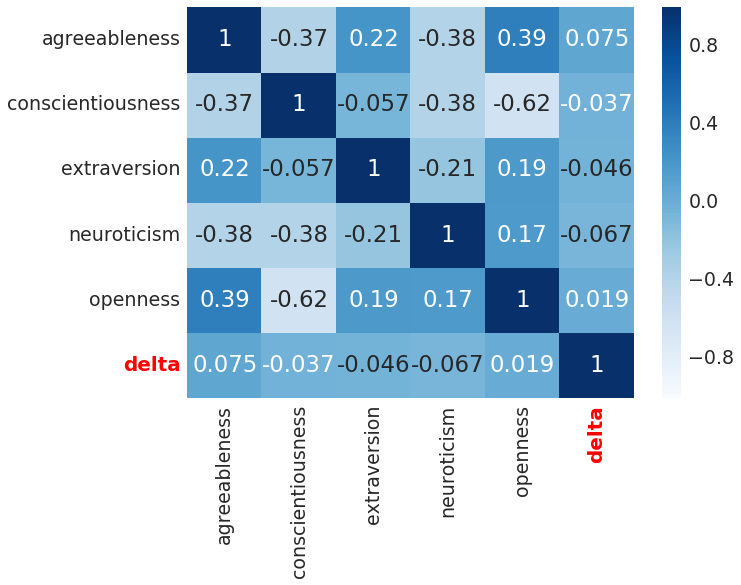

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set(style="whitegrid", context="talk")
sns.set_color_codes("pastel")
sns.set(font_scale=1.9)

f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(df1.corr(), cmap='Blues', annot=True)


for lab, annot in zip(ax.get_xticklabels(), ax.texts):
    text =  lab.get_text()
    if text == 'delta':
        # set the properties of the ticklabel
        lab.set_weight('bold')
        lab.set_size(20)
        lab.set_color('red')

for lab, annot in zip(ax.get_yticklabels(), ax.texts):
    text =  lab.get_text()
    if text == 'delta':
        # set the properties of the ticklabel
        lab.set_weight('bold')
        lab.set_size(20)
        lab.set_color('red')

f.savefig('/home/username/workspace/figures/task2_heatmap_mypairs.pdf', bbox_inches="tight")


In [29]:
import re
import pandas as pd
def natural_keys(text):
    '''
    alist.sort(key=natural_keys) sorts in human order
    http://nedbatchelder.com/blog/200712/human_sorting.html
    (See Toothy's implementation in the comments)
    '''
    def atoi(text):
        return int(text) if text.isdigit() else text

    return [atoi(c) for c in re.split('(\d+)', text)]

In [85]:
list(full_df.columns)

['bigfive_0',
 'bigfive_1',
 'bigfive_2',
 'bigfive_3',
 'bigfive_4',
 'delta',
 'liwc_0',
 'liwc_1',
 'liwc_10',
 'liwc_11',
 'liwc_12',
 'liwc_13',
 'liwc_14',
 'liwc_15',
 'liwc_16',
 'liwc_17',
 'liwc_18',
 'liwc_19',
 'liwc_2',
 'liwc_20',
 'liwc_21',
 'liwc_22',
 'liwc_23',
 'liwc_24',
 'liwc_25',
 'liwc_26',
 'liwc_27',
 'liwc_28',
 'liwc_29',
 'liwc_3',
 'liwc_30',
 'liwc_31',
 'liwc_32',
 'liwc_33',
 'liwc_34',
 'liwc_35',
 'liwc_36',
 'liwc_37',
 'liwc_38',
 'liwc_39',
 'liwc_4',
 'liwc_40',
 'liwc_41',
 'liwc_42',
 'liwc_43',
 'liwc_44',
 'liwc_45',
 'liwc_46',
 'liwc_47',
 'liwc_48',
 'liwc_49',
 'liwc_5',
 'liwc_50',
 'liwc_51',
 'liwc_52',
 'liwc_53',
 'liwc_54',
 'liwc_55',
 'liwc_56',
 'liwc_57',
 'liwc_58',
 'liwc_6',
 'liwc_7',
 'liwc_8',
 'liwc_9',
 'percentiles_0',
 'percentiles_1',
 'percentiles_10',
 'percentiles_11',
 'percentiles_12',
 'percentiles_13',
 'percentiles_14',
 'percentiles_15',
 'percentiles_16',
 'percentiles_17',
 'percentiles_18',
 'percentiles_1

In [79]:
list(enumerate(df2.columns))

[(0, 'active'),
 (1, 'adjustment'),
 (2, 'adventurous'),
 (3, 'aggressive'),
 (4, 'agreeableness'),
 (5, 'ambitious'),
 (6, 'anxious'),
 (7, 'artistic'),
 (8, 'assertive'),
 (9, 'body_focus'),
 (10, 'cautious'),
 (11, 'cheerful'),
 (12, 'cold'),
 (13, 'conscientiousness'),
 (14, 'cooperative'),
 (15, 'depression'),
 (16, 'disciplined'),
 (17, 'dutiful'),
 (18, 'emotionally_aware'),
 (19, 'empathetic'),
 (20, 'energetic'),
 (21, 'extraversion'),
 (22, 'family_oriented'),
 (23, 'food_focus'),
 (24, 'friend_focus'),
 (25, 'friendly'),
 (26, 'generous'),
 (27, 'genuine'),
 (28, 'happiness'),
 (29, 'health_oriented'),
 (30, 'humble'),
 (31, 'imaginative'),
 (32, 'impulsive'),
 (33, 'independent'),
 (34, 'insecure'),
 (35, 'intellectual'),
 (36, 'leisure_oriented'),
 (37, 'liberal'),
 (38, 'melancholy'),
 (39, 'money_oriented'),
 (40, 'netspeak_focus'),
 (41, 'neuroticism'),
 (42, 'openness'),
 (43, 'organized'),
 (44, 'persuasive'),
 (45, 'power_driven'),
 (46, 'religion_oriented'),
 (47, '

In [81]:
bf = ['percentiles_5', 'percentiles_14', 'percentiles_22', 'percentiles_42', 'percentiles_43', ]
# df2 = full_df[types['percentiles']+['delta']]
df2 = full_df[bf+['delta']]

print(sorted(df2.columns, key=natural_keys))
df2 = df2.reindex(columns=sorted(df2.columns, key=natural_keys))
# bf = ['agreeableness', 'conscientiousness', 'extraversion', 'neuroticism', 'openness']
df2.columns = labels+['delta']
df2.columns


['delta', 'percentiles_5', 'percentiles_14', 'percentiles_22', 'percentiles_42', 'percentiles_43']


Index(['agreeableness', 'conscientiousness', 'extraversion', 'neuroticism', 'openness', 'delta'], dtype='object')

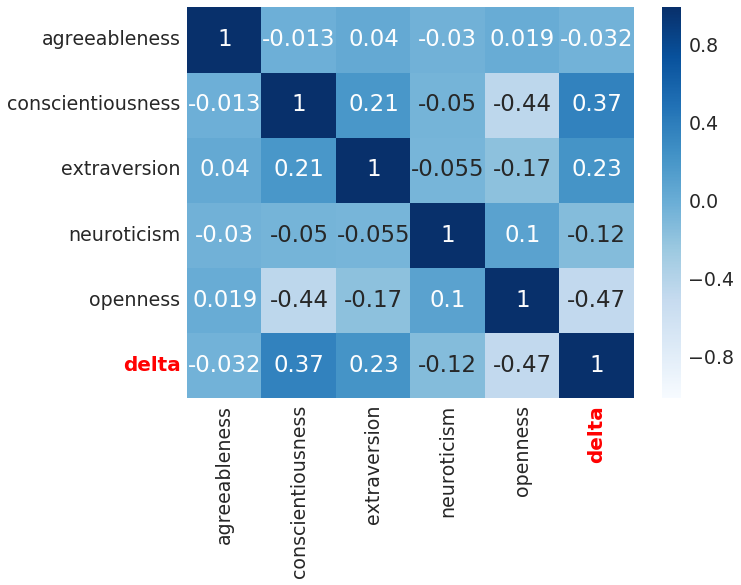

In [82]:
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(df2.corr(), cmap='Blues', annot=True)


for lab, annot in zip(ax.get_xticklabels(), ax.texts):
    text =  lab.get_text()
    if text == 'delta':
        # set the properties of the ticklabel
        lab.set_weight('bold')
        lab.set_size(20)
        lab.set_color('red')

for lab, annot in zip(ax.get_yticklabels(), ax.texts):
    text =  lab.get_text()
    if text == 'delta':
        # set the properties of the ticklabel
        lab.set_weight('bold')
        lab.set_size(20)
        lab.set_color('red')

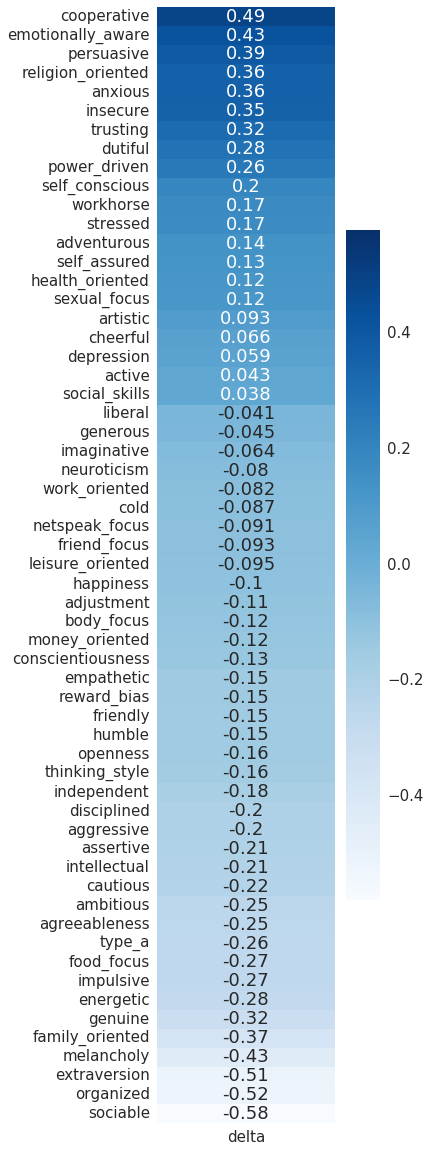

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set(style="whitegrid", context="talk")
sns.set_color_codes("pastel")
sns.set(font_scale=1.5)

f, ax = plt.subplots(figsize=(4, 20))
# sns.heatmap(df.corr()[['delta']].drop(['delta'], axis=0).sort_values('delta', ascending=False), cmap='Blues', annot=True)

sns.heatmap(df2.corr()[['delta']].drop(['delta'], axis=0).sort_values('delta', ascending=False), cmap='Blues', annot=True)
# ax.set(xlabel='authors', ylabel='subreddits')

# ax.set(ax.get_xticklabels(), rotation=45)
for item in ax.get_yticklabels():
    item.set_rotation(0)
    
# f.savefig('/home/username/workspace/figures/tmp.pdf')

f.savefig('/home/username/workspace/figures/task2_mypairs_percentilesfull_corr.pdf', bbox_inches="tight")

In [42]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [47]:
df2.corr()

,active,adjustment,adventurous,aggressive,agreeableness,ambitious,anxious,artistic,assertive,body_focus,cautious,cheerful,cold,conscientiousness,cooperative,depression,disciplined,dutiful,emotionally_aware,empathetic,energetic,extraversion,family_oriented,food_focus,friend_focus,friendly,generous,genuine,happiness,health_oriented,humble,imaginative,impulsive,independent,insecure,intellectual,leisure_oriented,liberal,melancholy,money_oriented,netspeak_focus,neuroticism,openness,organized,persuasive,power_driven,religion_oriented,reward_bias,self_assured,self_conscious,sexual_focus,sociable,social_skills,stressed,thinking_style,trusting,type_a,work_oriented,workhorse,delta
active,1.000000,-0.040689,-0.007853,0.003713,-0.052915,0.075209,-0.012768,-0.028051,-0.006923,-0.079964,-0.050230,-0.025311,0.052860,0.024066,-0.036812,0.040212,-0.030298,-0.031414,-0.027055,0.087738,0.072348,-0.034918,-0.045944,-0.029532,-0.038887,-0.015098,0.016191,0.078986,0.040084,0.048170,-0.047666,0.077362,0.044020,-0.015048,0.032552,0.036450,-0.005924,-0.098539,-0.053591,-0.056057,-0.077324,0.007618,-0.066708,0.018670,-0.032497,0.015429,-0.072793,-0.070858,-0.001617,-0.006745,0.011102,-0.083050,0.043038,-0.000391,-0.077120,-0.055503,-0.015561,-0.070734,-0.100892,0.042681
adjustment,-0.040689,1.000000,-0.195427,0.081051,-0.036839,0.167252,0.117867,-0.281991,-0.202937,-0.066803,0.384201,-0.114404,0.199691,0.003307,0.049099,0.071669,-0.106337,0.182471,-0.015628,0.113122,0.145759,0.182355,0.722009,0.154329,0.117696,0.069647,0.285129,0.114572,0.091227,0.135945,0.082250,0.037098,-0.303208,0.115092,-0.130480,-0.125846,0.253122,-0.144291,0.088043,-0.263649,-0.027533,-0.489999,-0.219928,-0.064712,-0.085642,0.137313,-0.043468,0.019266,0.155313,0.250386,-0.217299,0.066043,-0.041140,0.318260,-0.172173,-0.264223,0.456090,-0.019369,0.018051,-0.110871
adventurous,-0.007853,-0.195427,1.000000,0.053696,-0.294445,0.003199,0.066676,0.172622,-0.018688,0.023312,-0.185949,-0.169835,0.022862,-0.317135,0.130149,0.207156,-0.403680,0.082550,0.339927,-0.305744,-0.094101,0.014768,-0.082216,-0.110062,-0.082938,-0.129299,-0.039555,-0.077610,0.079315,0.123677,-0.101657,0.065453,0.053350,-0.120021,0.170008,-0.190153,-0.342101,0.203699,-0.200685,-0.180170,0.071609,0.414662,-0.162136,-0.165695,0.211947,0.373572,0.089258,-0.112097,-0.002536,-0.326173,-0.026396,-0.117879,0.097431,-0.030876,-0.114015,0.315784,-0.110783,-0.091735,0.079393,0.137151
aggressive,0.003713,0.081051,0.053696,1.000000,-0.186090,0.430656,0.228576,-0.413090,0.317666,-0.079391,-0.000280,-0.485522,0.435599,-0.127346,-0.085488,0.227074,-0.296221,-0.046001,0.047019,0.169296,0.209490,0.243381,0.341531,-0.033524,0.072922,-0.008125,0.303025,0.218799,0.523263,0.284904,-0.150232,-0.008932,-0.191061,0.324565,-0.102697,-0.427640,-0.021068,0.303528,-0.009694,-0.319934,0.027253,0.220071,-0.361501,0.430189,-0.072888,0.114765,-0.015271,-0.114917,0.441334,0.006341,-0.558460,-0.074268,0.216327,0.228867,-0.333334,-0.070918,0.544540,-0.098290,-0.006250,-0.203568
agreeableness,-0.052915,-0.036839,-0.294445,-0.186090,1.000000,-0.269478,-0.362468,0.088597,0.253316,0.133957,0.270382,0.301177,-0.359403,0.531155,-0.469384,-0.690193,0.450024,-0.298800,-0.615944,0.030516,-0.171303,0.071172,-0.106594,0.103886,-0.019187,0.155596,-0.389385,-0.138658,-0.129322,-0.448331,0.052390,-0.435208,0.251072,0.295383,-0.213401,0.492370,0.141818,-0.150367,0.225826,0.575106,-0.070347,-0.222131,0.729505,0.238794,-0.447757,-0.378452,-0.032889,0.254439,-0.208048,0.040195,0.161258,0.349804,-0.021216,-0.384338,0.568876,-0.179812,0.009492,0.731369,-0.058582,-0.253670
ambitious,0.075209,0.167252,0.003199,0.430656,-0.269478,1.000000,-0.158307,-0.308793,0.167649,-0.618796,0.018896,-0.401276,0.477289,0.062950,-0.371726,0.538401,-0.152705,-0.355538,-0.150771,0.494446,0.833214,0.258192,0.224039,-0.046113,0.035917,0.042102,0.418265,0.823013,0.730891,0.192943,-0.058854,0.625955,0.045298,0.072586,-0.272398,0.027570,0.206341,0.085934,0.029537,-0.298146,-0.547667,0.144001,-0.3